# 2 Regression

# 2_1

Epoch: 0
Loss: [196.31308511+3.00892106j]
--------------------------
Epoch: 1
Loss: [7719552.73122607+304916.51762372j]
--------------------------
Epoch: 2
Loss: [8.91154214e+20+1.06110924e+20j]
--------------------------
Epoch: 3
Loss: [1.32492929e+63+4.91972104e+62j]
--------------------------
Epoch: 4
Loss: [2.66659641e+189+4.83308916e+189j]
--------------------------
Epoch: 5
Loss: [nan+nanj]
--------------------------
Epoch: 6
Loss: [nan+nanj]
--------------------------
Epoch: 7
Loss: [nan+nanj]
--------------------------
Epoch: 8
Loss: [nan+nanj]
--------------------------
Epoch: 9
Loss: [nan+nanj]
--------------------------
Epoch: 10
Loss: [nan+nanj]
--------------------------
Epoch: 11
Loss: [nan+nanj]
--------------------------
Epoch: 12
Loss: [nan+nanj]
--------------------------
Epoch: 13
Loss: [nan+nanj]
--------------------------
Epoch: 14
Loss: [nan+nanj]
--------------------------
Epoch: 15
Loss: [nan+nanj]
--------------------------
Epoch: 16
Loss: [nan+nanj]
----------

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\2436512996.py:82: RuntimeWarning: overflow encountered in square
  return np.mean((y_true-y_predict)**2,axis = 0)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\2436512996.py:82: RuntimeWarning: invalid value encountered in square
  return np.mean((y_true-y_predict)**2,axis = 0)
C:\Users\Ansar9811291\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\2436512996.py:53: RuntimeWarning: invalid value encountered in less_equal
  self.b_output[self.input<=0] = 0
C:\Users\Ansar9811291\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


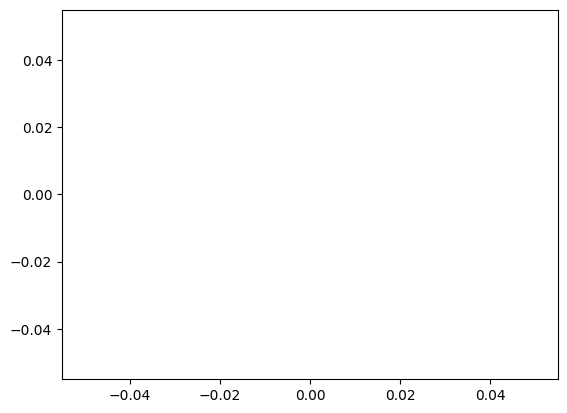

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class Dense:
    def __init__(self,n_inputs,n_neurons):
       
        self.w=np.random.randint(-2, 2, (n_inputs, n_neurons))
        self.b = np.random.randint(-2, 2, (1, n_neurons))    #b
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
        #print(self.output)
        
    def backward(self,b_input):
        #print(type(b_input))
        #print(b_input)
        #print(type(self.w))
        #print(self.w)
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

class Linear:
    def forward(self,inputs):
        self.input = inputs
        self.output = inputs
    def backward(self,b_input):
        self.b_output = b_input  

class Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.input = inputs
        self.output = 1/(1+np.exp(-inputs))
    def backward(self,b_input):
        self.b_output = b_input*self.output*(1-self.output)

class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        self.input = inputs
    
    def backward(self,b_input):
        self.b_output = b_input
        self.b_output[self.input<=0] = 0

class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update
    
    def discard(self,layer):
        layer.w = layer.w 
        layer.b = layer.b 

class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_predict,y_true):
        return np.mean((y_true-y_predict)**2,axis = 0)
    
    def backward(self,y_predict,y_true):
        self.b_output = -2*(y_true-y_predict)

#2_1

p=[]
t=[]

p_test=[]
t_test=[]

for i in range(400):
    dataP = np.random.randint(-4,4)
    p.append(dataP)
    
    epsilon=np.random.normal(0, 1)
    
    dataT=(16+epsilon-(dataP**2))**(1/2)
    t.append(dataT)

p = pd.DataFrame(p,columns =['x_train'])
t = pd.DataFrame(t,columns =['y_train'])


for i in range(100):
    dataP = np.random.randint(-3,3)
    p_test.append(dataP)
    
    epsilon=np.random.normal(0, 1)
    
    dataT=(16+epsilon-(dataP**2))**(1/2)
    t_test.append(dataT)
        
p_test=pd.DataFrame(p_test,columns =['x_test'])
t_test=pd.DataFrame(t_test,columns =['y_test'])

x_train=[]
y_train=[]
x_test=[]
y_test=[]

#Creating train data
for i in range(400):
    temp=[]
    temp.append(p['x_train'][i])
    x_train.append(temp)
    
for i in range(400):
    temp=[]
    temp.append(t['y_train'][i])
    y_train.append(temp)

#Creating test data
for i in range(100):
    temp=[]
    temp.append(p_test['x_test'][i])
    x_test.append(temp)


for i in range(100):
    temp=[]
    temp.append(t_test['y_test'][i])
    y_test.append(temp)
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# 2_1_a neural network model
Layer1 = Dense(1,5)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)



y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch: 0
Loss: [31.34323492+0.31847592j]
--------------------------
Epoch: 1
Loss: [10.72634509-0.33820632j]
--------------------------
Epoch: 2
Loss: [2.8518876-0.29418617j]
--------------------------
Epoch: 3
Loss: [1.09767022-0.24181814j]
--------------------------
Epoch: 4
Loss: [0.81738774-0.20812905j]
--------------------------
Epoch: 5
Loss: [0.75450226-0.20012793j]
--------------------------
Epoch: 6
Loss: [0.70899043-0.19522471j]
--------------------------
Epoch: 7
Loss: [0.669102-0.19050739j]
--------------------------
Epoch: 8
Loss: [0.63293062-0.18562328j]
--------------------------
Epoch: 9
Loss: [0.59974469-0.18061096j]
--------------------------
Epoch: 10
Loss: [0.56908566-0.17555496j]
--------------------------
Epoch: 11
Loss: [0.54061684-0.17052664j]
--------------------------
Epoch: 12
Loss: [0.51407835-0.16558038j]
--------------------------
Epoch: 13
Loss: [0.48926359-0.16075578j]
--------------------------
Epoch: 14
Loss: [0.46600496-0.15608113j]
------------------

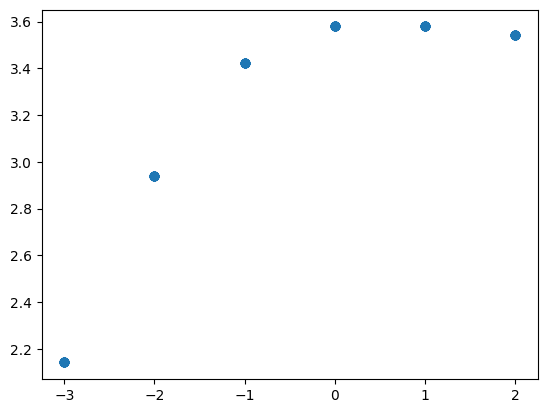

In [2]:
# 2_1_b neural network model
Layer1 = Dense(1,5)
Act1 = Sigmoid()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)

for epoch in range(20):
    #forward
    
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)


#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch 0 :
Loss [8.73754454+0.36107053j]
--------------------------
Epoch 1 :
Loss [1.30405219-0.37480548j]
--------------------------
Epoch 2 :
Loss [1.22531419-0.36818161j]
--------------------------
Epoch 3 :
Loss [1.22216467-0.36791666j]
--------------------------
Epoch 4 :
Loss [1.22203868-0.36790606j]
--------------------------
Epoch 5 :
Loss [1.22203365-0.36790564j]
--------------------------
Epoch 6 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 7 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 8 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 9 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 10 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 11 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 12 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 13 :
Loss [1.22203344-0.36790562j]
--------------------------
Epoch 14 :
Loss [1.22203344-0.36790562j]
-----------------

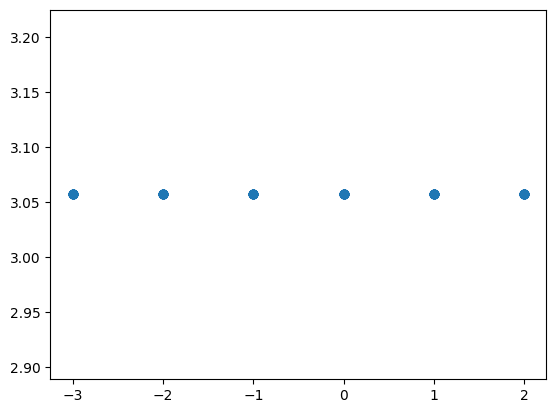

In [3]:
# 2_1_c neural network model

Layer1 = Dense(1,10)
Act1 = ReLU()

Layer2 = Dense(10,5)
Act2 = ReLU()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)



for epoch in range(20):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)


Epoch 0 :
Loss [10.94915079-0.08987325j]
--------------------------
Epoch 1 :
Loss [1.31191251-0.38401437j]
--------------------------
Epoch 2 :
Loss [1.2703908-0.37829933j]
--------------------------
Epoch 3 :
Loss [1.26145066-0.37579408j]
--------------------------
Epoch 4 :
Loss [1.25485388-0.37390879j]
--------------------------
Epoch 5 :
Loss [1.24946178-0.37241191j]
--------------------------
Epoch 6 :
Loss [1.24496222-0.37118432j]
--------------------------
Epoch 7 :
Loss [1.24114541-0.37014687j]
--------------------------
Epoch 8 :
Loss [1.2378584-0.36924457j]
--------------------------
Epoch 9 :
Loss [1.23498719-0.36843793j]
--------------------------
Epoch 10 :
Loss [1.23244525-0.36769759j]
--------------------------
Epoch 11 :
Loss [1.23016584-0.36700087j]
--------------------------
Epoch 12 :
Loss [1.22809663-0.36632947j]
--------------------------
Epoch 13 :
Loss [1.22619598-0.3656679j]
--------------------------
Epoch 14 :
Loss [1.22443028-0.36500229j]
-------------------

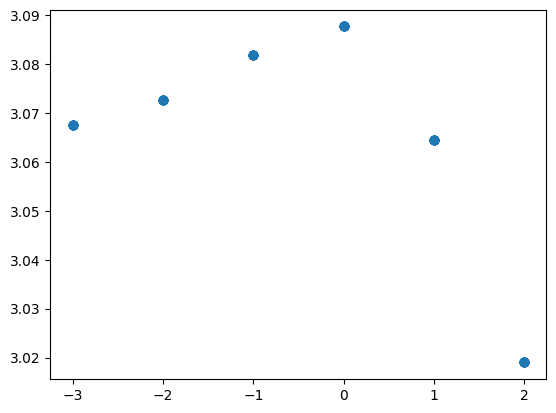

In [4]:

# 2_1_d neural network model

Layer1 = Dense(1,10)
Act1 = Sigmoid()

Layer2 = Dense(10,5)
Act2 = Sigmoid()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)

for epoch in range(20):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)    


# 2-2

In [5]:

class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.randn(n_inputs,n_neurons)   #w
        self.b = np.ones([1,n_neurons])    #b
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
    
    def backward(self,b_input):
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

Data = np.loadtxt('housing_train.txt')
Test_Data = np.loadtxt('housing_test.txt')

x_train = Data[0:16].T[0:13].T
y_train = Data[0:16].T[13].reshape(-1,1)
x_test = Data[17:].T[0:13].T
y_test = Data[17:].T[13].reshape(-1,1)




# 2_2_a

Epoch 0 :
Loss [1385091.74586252]
--------------------------
Epoch 1 :
Loss [1.79217065e+14]
--------------------------
Epoch 2 :
Loss [2.31956238e+22]
--------------------------
Epoch 3 :
Loss [3.00215313e+30]
--------------------------
Epoch 4 :
Loss [3.88561372e+38]
--------------------------
Epoch 5 :
Loss [5.02905527e+46]
--------------------------
Epoch 6 :
Loss [6.50898383e+54]
--------------------------
Epoch 7 :
Loss [8.42441934e+62]
--------------------------
Epoch 8 :
Loss [1.09035209e+71]
--------------------------
Epoch 9 :
Loss [1.41121617e+79]
--------------------------
Epoch 10 :
Loss [1.82650274e+87]
--------------------------
Epoch 11 :
Loss [2.36399804e+95]
--------------------------
Epoch 12 :
Loss [3.05966512e+103]
--------------------------
Epoch 13 :
Loss [3.9600501e+111]
--------------------------
Epoch 14 :
Loss [5.12539646e+119]
--------------------------
Epoch 15 :
Loss [6.63367588e+127]
--------------------------
Epoch 16 :
Loss [8.58580523e+135]
-----------

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\2436512996.py:82: RuntimeWarning: overflow encountered in square
  return np.mean((y_true-y_predict)**2,axis = 0)


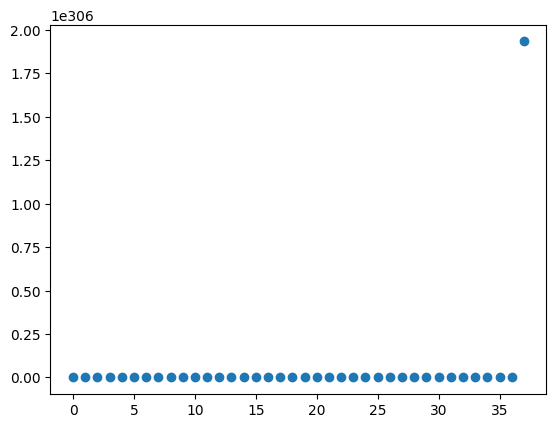

In [6]:
Layer1 = Dense(13,1)
Act1 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)

e = []
l = []
for epoch in range(50):
    for i in range(int(len(Data)/16)):
        low = 16*i
    high = low + 16
    x_train = Data[low:high].T[0:13].T
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)    
    loss = Loss.forward(Act1.output,y_train)
    print("Epoch", epoch,":")
    print("Loss", loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act1.output,y_train)
    
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
            
    e.append(epoch)
    l.append(loss)
    
Layer1.forward(x_train)
Act1.forward(Layer1.output)    
loss = Loss.forward(Act1.output,y_train)
print("Loss for testing data:", loss)

plt.scatter(e,l)


# 2_2_b

epoch 0
loss [32792.61026107]
--------------------------
epoch 1
loss [756.70490583]
--------------------------
epoch 2
loss [711.5939213]
--------------------------
epoch 3
loss [669.32384613]
--------------------------
epoch 4
loss [629.71577122]
--------------------------
epoch 5
loss [592.60205443]
--------------------------
epoch 6
loss [557.82561107]
--------------------------
epoch 7
loss [525.23924901]
--------------------------
epoch 8
loss [494.70504568]
--------------------------
epoch 9
loss [466.09376434]
--------------------------
epoch 10
loss [439.28430706]
--------------------------
epoch 11
loss [414.16320216]
--------------------------
epoch 12
loss [390.62412396]
--------------------------
epoch 13
loss [368.56744275]
--------------------------
epoch 14
loss [347.8998031]
--------------------------
epoch 15
loss [328.53372872]
--------------------------
epoch 16
loss [310.38725224]
--------------------------
epoch 17
loss [293.38356826]
--------------------------
ep

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\2436512996.py:39: RuntimeWarning: overflow encountered in exp
  self.output = 1/(1+np.exp(-inputs))


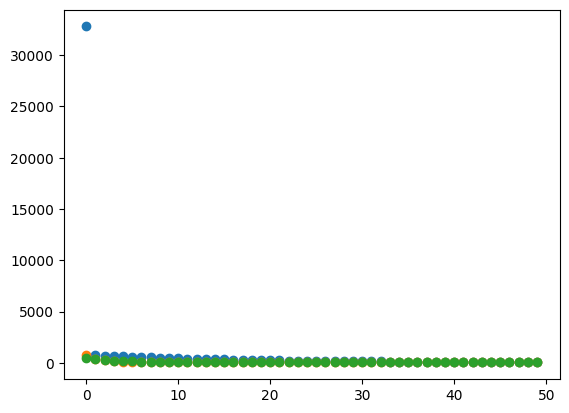

In [7]:
Layer1 = Dense(13,5)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)

e = []
l = []
for epoch in range(50):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
        
    print("epoch",epoch)
    print("loss",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    e.append(epoch)
    l.append(loss)
    
plt.scatter(e,l)

#2-2-c
Layer1 = Dense(13,15)
Act1 = Sigmoid()
Layer2 = Dense(15,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)

e = []
l = []
for epoch in range(50):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    
    # Report
    #y_predict = np.argmax(Act2.output,axis = 1)
    #accuracy = np.mean(y_train == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    #print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    e.append(epoch)
    l.append(loss)
    
plt.scatter(e,l)

#2_2_d
Layer1 = Dense(13,10)
Act1 = ReLU()
Layer2 = Dense(10,5)
Act2 = Sigmoid()
Layer3 = Dense(5,1)
Act3 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)

e = []
l = []
for epoch in range(50):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
        
    # Report
    print("epoch",epoch)
    print("loss", loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    e.append(epoch)
    l.append(loss)
    
plt.scatter(e,l)


# 2-3

In [8]:
class RMSprop():
    def __init__(self, gamma = 0.8,learning_rate = 0.01):
        self.v_dw = 0
        self.v_db = 0
        self.gamma = gamma
        self.learning_rate = learning_rate

    def update(self, layer):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        
        self.v_dw = self.gamma * self.v_dw + (1 - self.gamma) * layer.g_w ** 2
        self.v_db = self.gamma * self.v_db + (1 - self.gamma) * layer.g_b ** 2

        layer.w -= (self.learning_rate / (np.sqrt( self.v_dw+ 1e-08))) * layer.g_w
        layer.b -= (self.learning_rate / (np.sqrt(self.v_db + 1e-08))) * layer.g_b
     

In [9]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta

    def update(self, t, layer):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        
        self.m_dw = self.beta1*(self.m_dw) + (1-self.beta1)* layer.g_w
        # *** biases *** #
        self.m_db = self.beta1*(self.m_db) + (1-self.beta1)* layer.g_b

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*(self.v_dw) + (1-self.beta2)*(layer.g_w**2)
        # *** biases *** #
        self.v_db = self.beta2*(self.v_db) + (1-self.beta2)*(layer.g_b)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)
        
        print(m_dw_corr)
        
        print(v_dw_corr)
        print((np.sqrt(v_dw_corr)+self.epsilon))

        ## update weights and biases
        layer.w = layer.w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        layer.b = layer.b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        


Epoch 0 :
Loss [5150.34972656]
--------------------------
[[inf]
 [nan]
 [inf]
 [nan]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
[[inf]
 [nan]
 [inf]
 [nan]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
[[inf]
 [nan]
 [inf]
 [nan]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
Epoch 1 :
Loss [nan]
--------------------------
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 2 :
Loss [nan]
--------------------------
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 3 :
Loss [na

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:26: RuntimeWarning: divide by zero encountered in true_divide
  m_dw_corr = self.m_dw/(1-self.beta1**t)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:26: RuntimeWarning: invalid value encountered in true_divide
  m_dw_corr = self.m_dw/(1-self.beta1**t)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:27: RuntimeWarning: divide by zero encountered in true_divide
  m_db_corr = self.m_db/(1-self.beta1**t)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:28: RuntimeWarning: divide by zero encountered in true_divide
  v_dw_corr = self.v_dw/(1-self.beta2**t)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:28: RuntimeWarning: invalid value encountered in true_divide
  v_dw_corr = self.v_dw/(1-self.beta2**t)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_16088\4012035994.py:29: RuntimeWarning: divide by zero encountered in true_d

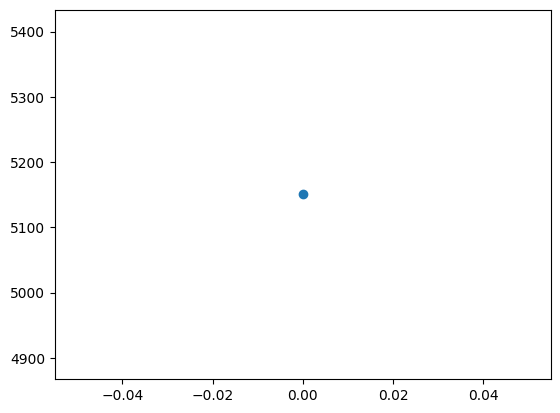

In [10]:
#2_3


Layer1 = Dense(13,1)
Act1 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = AdamOptim(0.001)


e = []
l = []
for epoch in range(50):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)    
    loss = Loss.forward(Act1.output,y_train)
    print("Epoch", epoch,":")
    print("Loss", loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act1.output,y_train)
    
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(epoch,Layer1)
            
    e.append(epoch)
    l.append(loss)
    
Layer1.forward(x_train)
Act1.forward(Layer1.output)    
loss = Loss.forward(Act1.output,y_train)
print("Loss for testing data:", loss)

plt.scatter(e,l)

Optimizer = RMSprop(0.001)
Optimizer.update(Layer1)



# 2-4

In [11]:
learning_rate = 0.001
Layer1 = Dense(13,1)
Act1 = Linear()
Loss = Mean_Square_Error_loss()


loss_old = 100
Layer1_history = Layer1

for epoch in range(50):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)    
    loss = Loss.forward(Act1.output,y_train)
    
    #report
    print("Epoch", epoch,":")
    print("Loss", loss)
    print("Learning_rate", learning_rate)
    print('--------------------------')
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
        
    if (1.04 <loss/loss_old):
        #discard weight update
        Layer1 = Layer1_history
        learning_rate = learning_rate * 0.7
        
    elif(loss/loss_old<1):
        #accept weight update
        learning_rate = learning_rate * 1.05
        
        
    
    #keeping old params    
    Layer1_history = Layer1
    loss_old = loss
        
    #update params
    Optimizer = SGD(learning_rate)
    Optimizer.update(Layer1)
    


Epoch 0 :
Loss [1616392.6981359]
Learning_rate 0.001
--------------------------
Epoch 1 :
Loss [1.02402832e+14]
Learning_rate 0.0007
--------------------------
Epoch 2 :
Loss [3.1816405e+21]
Learning_rate 0.00049
--------------------------
Epoch 3 :
Loss [4.84306029e+28]
Learning_rate 0.000343
--------------------------
Epoch 4 :
Loss [3.61151404e+35]
Learning_rate 0.00024009999999999998
--------------------------
Epoch 5 :
Loss [1.31922384e+42]
Learning_rate 0.00016806999999999998
--------------------------
Epoch 6 :
Loss [2.36020085e+48]
Learning_rate 0.00011764899999999998
--------------------------
Epoch 7 :
Loss [2.06774588e+54]
Learning_rate 8.235429999999999e-05
--------------------------
Epoch 8 :
Loss [8.86836681e+59]
Learning_rate 5.764800999999999e-05
--------------------------
Epoch 9 :
Loss [1.86130529e+65]
Learning_rate 4.035360699999999e-05
--------------------------
Epoch 10 :
Loss [1.91062178e+70]
Learning_rate 2.8247524899999994e-05
--------------------------
Epoch 11

# 2-5, i=1

In [12]:
i =1
x_train = np.random.uniform(-3, 3, 200).reshape(-1,1)
y_train = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

In [13]:
#Creating the neural network
Layer1=Dense(1,4)
Act1 = Sigmoid()

Layer2=Dense(4,4)
Act2 = Sigmoid()

Layer3 = Dense(4,1)
Act3 = Sigmoid()

Loss =  Mean_Square_Error_loss()
Optimizer = SGD()

In [14]:
for epoch in range(10):
            #forward
            Layer1.forward(x_train)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
            Layer3.forward(Act2.output)
            Act3.forward(Layer3.output)
            loss = Loss.forward(Act3.output,y_train)
            
            print(f'Epoch:{epoch}')
            print(f'Loss: {loss}')
            print('--------------------------')

            #backward
            Loss.backward(Act3.output,y_train)
            Act3.backward(Loss.b_output)
            Layer3.backward(Act3.b_output)
            Act2.backward(Layer3.b_output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)

            #update params
            Optimizer.update(Layer1)
            Optimizer.update(Layer2)
        



Epoch:0
Loss: [4.12974663]
--------------------------
Epoch:1
Loss: [4.11641445]
--------------------------
Epoch:2
Loss: [4.10225523]
--------------------------
Epoch:3
Loss: [4.0872031]
--------------------------
Epoch:4
Loss: [4.0711846]
--------------------------
Epoch:5
Loss: [4.05411818]
--------------------------
Epoch:6
Loss: [4.03591413]
--------------------------
Epoch:7
Loss: [4.0164753]
--------------------------
Epoch:8
Loss: [3.99569892]
--------------------------
Epoch:9
Loss: [3.97348014]
--------------------------


In [15]:
#i =[1,2,4,8]
x_test = np.random.uniform(-4, 4, 200).reshape(-1,1)
y_test = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
loss = Loss.forward(Act3.output,y_test)
            
print(f'Final Loss for new data: {loss}')
print('--------------------------')



Final Loss for new data: [3.94341651]
--------------------------


# 2-5, i= 2

In [16]:
i =2
x_train = np.random.uniform(-3, 3, 200).reshape(-1,1)
y_train = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

In [17]:
#Creating the neural network
Layer1=Dense(1,4)
Act1 = Sigmoid()

Layer2=Dense(4,4)
Act2 = Sigmoid()

Layer3 = Dense(4,1)
Act3 = Sigmoid()

Loss =  Mean_Square_Error_loss()
Optimizer = SGD()

In [18]:
for epoch in range(10):
            #forward
            Layer1.forward(x_train)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
            Layer3.forward(Act2.output)
            Act3.forward(Layer3.output)
            loss = Loss.forward(Act3.output,y_train)
            
            print(f'Epoch:{epoch}')
            print(f'Loss: {loss}')
            print('--------------------------')

            #backward
            Loss.backward(Act3.output,y_train)
            Act3.backward(Loss.b_output)
            Layer3.backward(Act3.b_output)
            Act2.backward(Layer3.b_output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)

            #update params
            Optimizer.update(Layer1)
            Optimizer.update(Layer2)

Epoch:0
Loss: [2.21579976]
--------------------------
Epoch:1
Loss: [2.17976243]
--------------------------
Epoch:2
Loss: [2.14892309]
--------------------------
Epoch:3
Loss: [2.1221097]
--------------------------
Epoch:4
Loss: [2.09845595]
--------------------------
Epoch:5
Loss: [2.07732067]
--------------------------
Epoch:6
Loss: [2.05822621]
--------------------------
Epoch:7
Loss: [2.04081349]
--------------------------
Epoch:8
Loss: [2.02480964]
--------------------------
Epoch:9
Loss: [2.01000487]
--------------------------


In [19]:
#i =[1,2,4,8]
x_test = np.random.uniform(-4, 4, 200).reshape(-1,1)
y_test = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
loss = Loss.forward(Act3.output,y_test)
            
print(f'Final Loss for new data: {loss}')
print('--------------------------')

Final Loss for new data: [2.00960023]
--------------------------


# 2-5, i=4

In [20]:
i = 4
x_train = np.random.uniform(-3, 3, 200).reshape(-1,1)
y_train = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

In [21]:
#Creating the neural network
Layer1=Dense(1,4)
Act1 = Sigmoid()

Layer2=Dense(4,4)
Act2 = Sigmoid()

Layer3 = Dense(4,1)
Act3 = Sigmoid()

Loss =  Mean_Square_Error_loss()
Optimizer = SGD()

In [22]:
for epoch in range(10):
            #forward
            Layer1.forward(x_train)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
            Layer3.forward(Act2.output)
            Act3.forward(Layer3.output)
            loss = Loss.forward(Act3.output,y_train)
            
            print(f'Epoch:{epoch}')
            print(f'Loss: {loss}')
            print('--------------------------')

            #backward
            Loss.backward(Act3.output,y_train)
            Act3.backward(Loss.b_output)
            Layer3.backward(Act3.b_output)
            Act2.backward(Layer3.b_output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)

            #update params
            Optimizer.update(Layer1)
            Optimizer.update(Layer2)

Epoch:0
Loss: [3.1129811]
--------------------------
Epoch:1
Loss: [3.10929442]
--------------------------
Epoch:2
Loss: [3.10564383]
--------------------------
Epoch:3
Loss: [3.10202682]
--------------------------
Epoch:4
Loss: [3.09844091]
--------------------------
Epoch:5
Loss: [3.09488368]
--------------------------
Epoch:6
Loss: [3.09135276]
--------------------------
Epoch:7
Loss: [3.08784588]
--------------------------
Epoch:8
Loss: [3.0843608]
--------------------------
Epoch:9
Loss: [3.08089542]
--------------------------


In [23]:
#i =[1,2,4,8]
x_test = np.random.uniform(-4, 4, 200).reshape(-1,1)
y_test = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
loss = Loss.forward(Act3.output,y_test)
            
print(f'Final Loss for new data: {loss}')
print('--------------------------')

Final Loss for new data: [3.07450717]
--------------------------


# 2-5, i = 8

In [24]:
i = 8
x_train = np.random.uniform(-3, 3, 200).reshape(-1,1)
y_train = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

In [25]:
#Creating the neural network
Layer1=Dense(1,4)
Act1 = Sigmoid()

Layer2=Dense(4,4)
Act2 = Sigmoid()

Layer3 = Dense(4,1)
Act3 = Sigmoid()

Loss =  Mean_Square_Error_loss()
Optimizer = SGD()

In [26]:
for epoch in range(10):
            #forward
            Layer1.forward(x_train)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
            Layer3.forward(Act2.output)
            Act3.forward(Layer3.output)
            loss = Loss.forward(Act3.output,y_train)
            
            print(f'Epoch:{epoch}')
            print(f'Loss: {loss}')
            print('--------------------------')

            #backward
            Loss.backward(Act3.output,y_train)
            Act3.backward(Loss.b_output)
            Layer3.backward(Act3.b_output)
            Act2.backward(Layer3.b_output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)

            #update params
            Optimizer.update(Layer1)
            Optimizer.update(Layer2)

Epoch:0
Loss: [2.31208374]
--------------------------
Epoch:1
Loss: [2.24302665]
--------------------------
Epoch:2
Loss: [2.1737263]
--------------------------
Epoch:3
Loss: [2.10554007]
--------------------------
Epoch:4
Loss: [2.04026961]
--------------------------
Epoch:5
Loss: [1.9798501]
--------------------------
Epoch:6
Loss: [1.92587496]
--------------------------
Epoch:7
Loss: [1.87919866]
--------------------------
Epoch:8
Loss: [1.8398377]
--------------------------
Epoch:9
Loss: [1.8071688]
--------------------------


In [27]:
#i =[1,2,4,8]
x_test = np.random.uniform(-4, 4, 200).reshape(-1,1)
y_test = (np.sin((x_train*i*np.pi/2)) - 1).reshape(-1,1)

Layer1.forward(x_test)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
loss = Loss.forward(Act3.output,y_test)
            
print(f'Final Loss for new data: {loss}')
print('--------------------------')

Final Loss for new data: [1.78246638]
--------------------------


# 2-6

In [28]:
x_train = np.random.uniform(-3, 3, 200).reshape(-1,1)
y_train = (np.sin((6*x_train*np.pi/2)) - 1).reshape(-1,1)


In [29]:
#Creating the neural network
i = [2,3,4,5]
for ind in i : 
    Layer1=Dense(1,ind)
    Act1 = Sigmoid()

    Layer2=Dense(ind,ind)
    Act2 = Sigmoid()

    Layer3 = Dense(ind,1)
    Act3 = Sigmoid()

    Loss =  Mean_Square_Error_loss()
    Optimizer = SGD()
    print("\nneuron number in hidden layer = ",ind)
    
    for epoch in range(10):
            #forward
            Layer1.forward(x_train)
            Act1.forward(Layer1.output)
            Layer2.forward(Act1.output)
            Act2.forward(Layer2.output)
            Layer3.forward(Act2.output)
            Act3.forward(Layer3.output)
            loss = Loss.forward(Act3.output,y_train)
            
            print(f'Epoch:{epoch}')
            print(f'Loss: {loss}')
            print('--------------------------')

            #backward
            Loss.backward(Act3.output,y_train)
            Act3.backward(Loss.b_output)
            Layer3.backward(Act3.b_output)
            Act2.backward(Layer3.b_output)
            Layer2.backward(Act2.b_output)
            Act1.backward(Layer2.b_output)
            Layer1.backward(Act1.b_output)

            #update params
            Optimizer.update(Layer1)
            Optimizer.update(Layer2)


neuron number in hidden layer =  2
Epoch:0
Loss: [2.46428656]
--------------------------
Epoch:1
Loss: [2.45143865]
--------------------------
Epoch:2
Loss: [2.43971107]
--------------------------
Epoch:3
Loss: [2.42899043]
--------------------------
Epoch:4
Loss: [2.41917387]
--------------------------
Epoch:5
Loss: [2.41016877]
--------------------------
Epoch:6
Loss: [2.40189227]
--------------------------
Epoch:7
Loss: [2.39427047]
--------------------------
Epoch:8
Loss: [2.38723766]
--------------------------
Epoch:9
Loss: [2.38073544]
--------------------------

neuron number in hidden layer =  3
Epoch:0
Loss: [4.34217209]
--------------------------
Epoch:1
Loss: [4.34161351]
--------------------------
Epoch:2
Loss: [4.34103958]
--------------------------
Epoch:3
Loss: [4.3404497]
--------------------------
Epoch:4
Loss: [4.33984324]
--------------------------
Epoch:5
Loss: [4.33921955]
--------------------------
Epoch:6
Loss: [4.33857794]
--------------------------
Epoch:7
Los

In [30]:
i =[1,2,4,8]
for ind in i:
    x_train = np.random.uniform(-4, 4, 200).reshape(-1,1)
    y_train = (np.sin((x_train*ind*np.pi/2)) - 1).reshape(-1,1)

    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)

    print(f'Final Loss for new data: {loss}')
    print('--------------------------')

Final Loss for new data: [2.843862]
--------------------------
Final Loss for new data: [2.57800833]
--------------------------
Final Loss for new data: [2.56851098]
--------------------------
Final Loss for new data: [2.59791869]
--------------------------
